In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

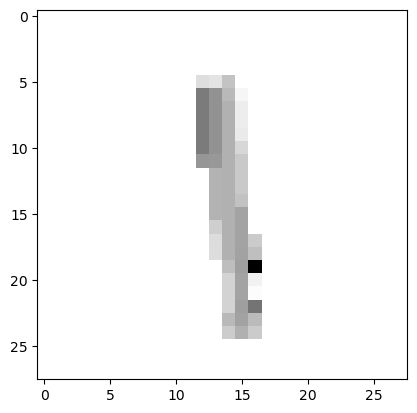

In [3]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()

draw(x_train[8])

In [4]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Input layer
# The Flatten layer converts the 2D input images (28x28 pixels) into a 1D vector (784 elements).

# the term "units" refers to the number of neurons or nodes in a particular layer.
# The number of units in a layer determines the complexity and capacity of the layer to learn patterns from the input data.
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu)) # Hidden Layer 1
model.add(tf.keras.layers.Dense(units=64,activation=tf.nn.relu)) # Hidden Layer 2

model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)) # Output Layer
# The number of units in the output layer depends on the number of classes you're trying to predict
# the MNIST dataset, there are 10 classes (digits 0 to 9), so the output layer has 10 units, each corresponding to a class.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3,batch_size=32)



Epoch 1/3


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2781 - accuracy: 0.9202
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9643
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9748


In [5]:

val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9708
loss->  0.09485723823308945 
acc->  0.97079998254776


313/313 [==============================] - 1s 3ms/step
label ->  7
[2.5296501e-07 4.0893221e-05 1.0057608e-02 5.4765627e-04 9.7630330e-09
 1.8724181e-06 8.7288861e-09 9.8931271e-01 3.8697839e-05 2.2645082e-07]
prediction ->  7


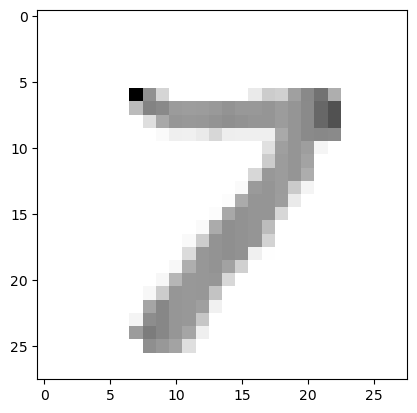

In [6]:

predictions=model.predict([x_test])
#print(predictions)
print('label -> ',y_test[34])
print(predictions[34])
print('prediction -> ',np.argmax(predictions[34]))

draw(x_test[34])

In [7]:

model.save('minstmodel.keras')

313/313 [==============================] - 1s 2ms/step
label ->  5
prediction ->  5


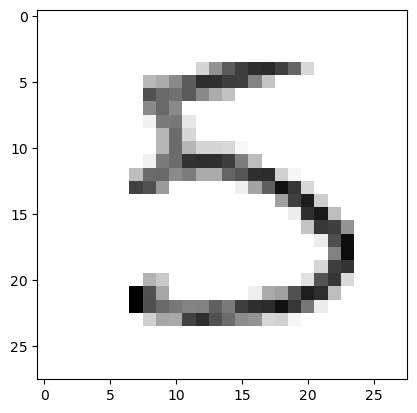

In [9]:

new_model = tf.keras.models.load_model('minstmodel.keras')
predictions=new_model.predict([x_test])


print('label -> ',y_test[15])
print('prediction -> ',np.argmax(predictions[15]))

draw(x_test[15])